In [1]:
!git clone https://nancy_singh@bitbucket.org/njnitesh/self_driving_car_data.git

Cloning into 'self_driving_car_data'...
remote: Counting objects: 23195, done.
remote: Compressing objects: 100% (23195/23195), done.
remote: Total 23195 (delta 1), reused 23194 (delta 0)
Receiving objects: 100% (23195/23195), 318.03 MiB | 18.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (23192/23192), done.


In [2]:
!ls self_driving_car_data


driving_log1.csv  driving_log.csv  IMG	IMG1


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D,Dense,MaxPooling2D,Dropout,Flatten
import cv2 as cv
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import pandas as pd
import random
import ntpath

Using TensorFlow backend.


In [4]:
datadir="self_driving_car_data"
column=["center","left","right","steering","throttle","reverse","speed"]
data=pd.read_csv(os.path.join(datadir,"driving_log.csv"),names=column)
data1=pd.read_csv(os.path.join(datadir,"driving_log1.csv"),names=column)
data.head()
data1.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.556126
1,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.570937
2,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.585599
3,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.600113
4,C:\Users\Tushar\Downloads\self1\IMG\center_201...,C:\Users\Tushar\Downloads\self1\IMG\left_2019...,C:\Users\Tushar\Downloads\self1\IMG\right_201...,0.0,0.0,0,3.617337


In [0]:
#p=data.iloc[0].center
#p.split("\\")[-1]

In [0]:
#to get the data of center images
data.center=data.center.apply(lambda x:x.split("\\")[-1])
data1.center=data1.center.apply(lambda x:x.split("\\")[-1])

In [6]:
dt=data.loc[:,["center","steering"]]
dt1=data1.loc[:,["center","steering"]]
dt1.head()

,center,steering
0,center_2019_06_12_18_08_47_758.jpg,0.0
1,center_2019_06_12_18_08_47_858.jpg,0.0
2,center_2019_06_12_18_08_47_964.jpg,0.0
3,center_2019_06_12_18_08_48_067.jpg,0.0
4,center_2019_06_12_18_08_48_174.jpg,0.0


In [9]:
num_bins=25
hist,bins=np.histogram(dt["steering"],num_bins)
type(hist)

numpy.ndarray

In [10]:
len((bins[:-1]+bins[1:])/2)

25

In [11]:
print(hist)
print(bins)
center=(bins[:-1]+bins[1:])*0.5
print(center)

[  18    5   13   28   66   34   79  174  253   69  109  189 4999   39
   25    9   70   56   20    8   27   17    4    1   12]
[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ]
[-0.96 -0.88 -0.8  -0.72 -0.64 -0.56 -0.48 -0.4  -0.32 -0.24 -0.16 -0.08
  0.    0.08  0.16  0.24  0.32  0.4   0.48  0.56  0.64  0.72  0.8   0.88
  0.96]


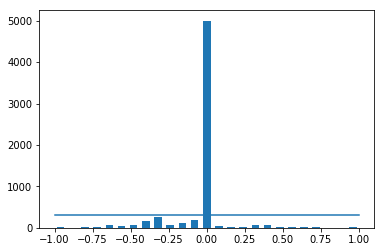

In [12]:
samples_per_bin=300
plt.bar(center,hist,width=0.05)
plt.plot((np.min(dt["steering"]),np.max(dt["steering"])),(samples_per_bin,samples_per_bin))

In [0]:
p=dt[(dt.steering>=-0.04) & (dt.steering<=0.04)]
p.count()
p.index[300:]
dt.drop(p.index[300:],inplace=True)

In [16]:
dt.count()

center      1625
steering    1625
dtype: int64

In [0]:
#method 2 for dropping for dt
print("total data:",len(dt))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range(len(dt["steering"])):
    if dt["steering"][i]>=bins[j] and dt["steering"][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)
  
print("removed:",len(remove_list))
dt.drop(dt.index[remove_list],inplace=True)
print("remaining:",len(dt))

#calculating the histogram for new plot
hist,_=np.histogram(dt["steering"],(num_bins))
plt.bar(center,hist,width=0.05)
print(hist)
plt.plot((np.min(dt["steering"]),np.max(dt["steering"])),(samples_per_bin,samples_per_bin))
    

total data: 1406
removed: 546
remaining: 860
[ 41   8   8  15  25  25  29  43  62  28  42  48 300  26  11  18  49  17
  10  12  21   7   2   8   5]


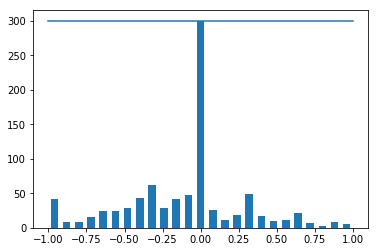

In [0]:
#to plot for dt1
print("total data:",len(dt1))
remove_list=[]
for j in range(num_bins):
  list_=[]
  for i in range(len(dt1["steering"])):
    if dt1["steering"][i]>=bins[j] and dt1["steering"][i]<=bins[j+1]:
      list_.append(i)
  list_=shuffle(list_)
  list_=list_[samples_per_bin:]
  remove_list.extend(list_)
  
print("removed:",len(remove_list))
dt1.drop(dt1.index[remove_list],inplace=True)
print("remaining:",len(dt1))

#calculating the histogram for new plot
hist,_=np.histogram(dt1["steering"],(num_bins))
plt.bar(center,hist,width=0.05)
print(hist)
plt.plot((np.min(dt1["steering"]),np.max(dt1["steering"])),(samples_per_bin,samples_per_bin))
    

[ 18   5  13  28  66  34  79 174 253  69 109 189 300  39  25   9  70  56
  20   8  27  17   4   1  12]


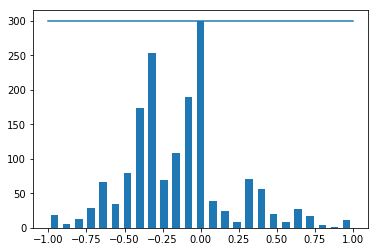

In [17]:
hist,_=np.histogram(dt["steering"],(num_bins))
plt.bar(center,hist,width=0.05)
print(hist)
plt.plot((np.min(dt["steering"]),np.max(dt["steering"])),(samples_per_bin,samples_per_bin))

In [0]:
dt.steering.count()

1625

In [0]:
def load_img_steering(base_dir,dataframe):
  image_paths=[]
  steering_angle=[]
  #taking dataframe as numpy array
  center=dataframe.iloc[:,0].values
  angle=dataframe.iloc[:,1].values
  #iterating the loop over the whole numpy array
  for i in range(len(dataframe)):
    image_paths.append(os.path.join(base_dir,center[i]))
    steering_angle.append(angle[i])
    
    
  #returning the list as numpy array
  image_p=np.array(image_paths)
  angle_p=np.array(steering_angle)
  return image_p,angle_p
                  
    

In [0]:
image_paths,steering=load_img_steering("self_driving_car_data/IMG",dt)
image_paths1,steering1=load_img_steering("self_driving_car_data/IMG1",dt1)

In [0]:
len(image_paths)==len(steering)

True

In [0]:
image_paths1[0]

'self_driving_car_data/IMG1/center_2019_06_12_18_08_47_964.jpg'

Text(0.5, 1.0, 'zoomed image')

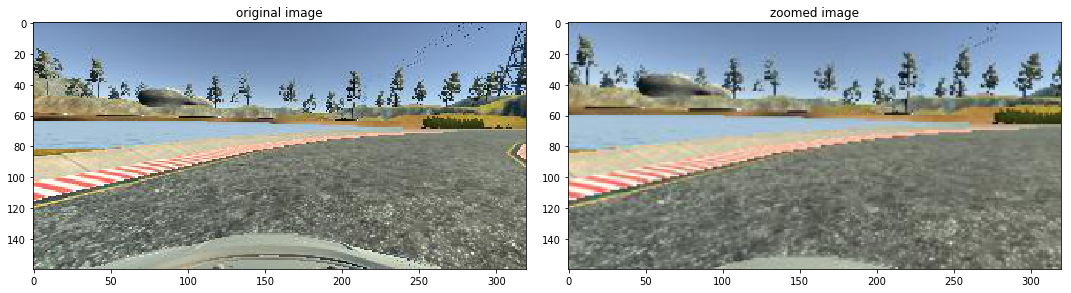

In [0]:
#definition for zooming image
def zoom(image):
  zoom=iaa.Affine(scale=(1,1.3))
  image=zoom.augment_image(image)
  return image

#image selection
image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)

#function applied
zoomed_image=zoom(original_image)

#ploting both image in one canvas
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("original image")

axs[1].imshow(zoomed_image)
axs[1].set_title("zoomed image")

In [0]:
len(steering)

1625

In [0]:
x_train,x_valid,y_train,y_valid=train_test_split(image_paths,steering,test_size=0.2,random_state=21)
print("training samples:{}\nValid Samples:{}".format(len(x_train),len(x_valid)))

training samples:1300
Valid Samples:325


In [0]:
x_train1,x_valid1,y_train1,y_valid1=train_test_split(image_paths1,steering1,test_size=0.2,random_state=21)
print("training samples:{}\nValid Samples:{}".format(len(x_train1),len(x_valid1)))

training samples:688
Valid Samples:172


Text(0.5, 1.0, 'panned_image')

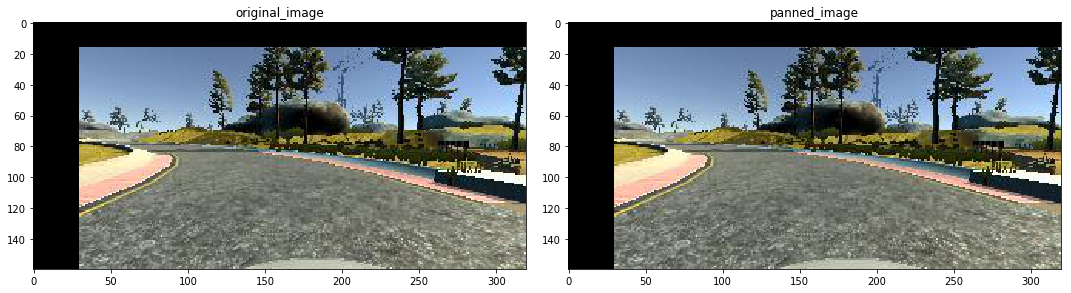

In [0]:
#definition for panning image
def pan(image):
  pan=iaa.Affine(translate_percent={"x":(-0.1,0.1),"y":(-0.1,0.1)})
  image=pan.augment_image(image)
  return image


image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
panned_image=pan(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()


axs[0].imshow(panned_image)
axs[0].set_title("original_image")

axs[1].imshow(panned_image)
axs[1].set_title("panned_image")

Text(0.5, 1.0, 'brightness altered image')

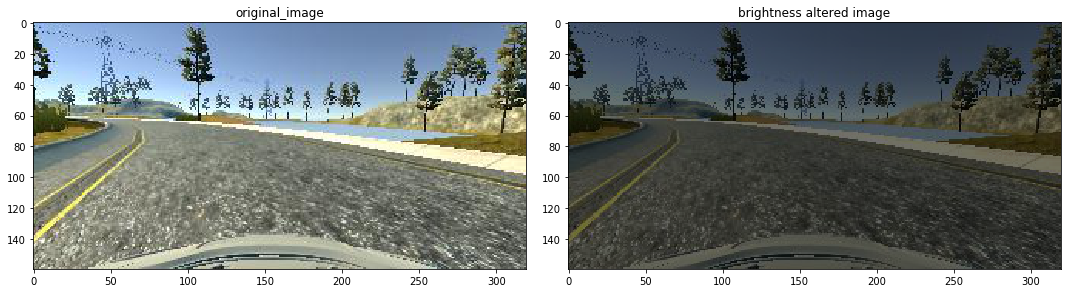

In [0]:
#definiton for brightness of image
def img_random_brightness(image):
  brightness=iaa.Multiply((0.2,1.2))
  image=brightness.augment_image(image)
  return image



image=image_paths[random.randint(0,1000)]
original_image=mpimg.imread(image)
brightness_altered_image=img_random_brightness(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title("original_image")

axs[1].imshow(brightness_altered_image)
axs[1].set_title("brightness altered image")

Text(0.5, 1.0, 'flipped image-steering angle-0.5557379')

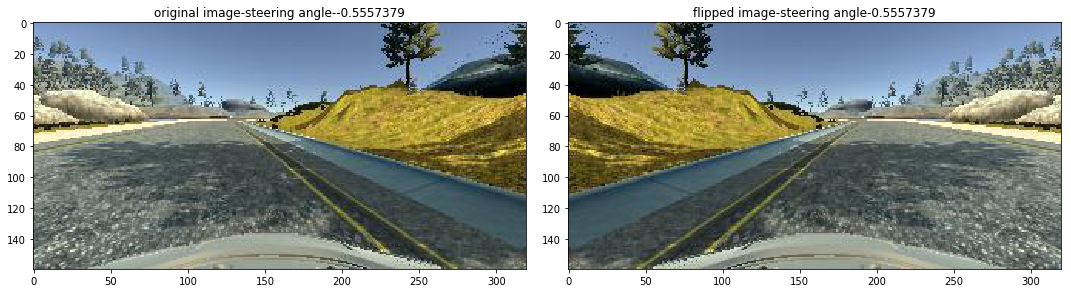

In [0]:
#definition  for flipping image steering angle
import cv2
def img_random_flip(image,steering_angle):
  image=cv2.flip(image,1)
  steering_angle=-steering_angle
  return image,steering_angle

random_index=random.randint(0,1000)
image=image_paths[random_index]
steering_angle=steering[random_index]

original_image=mpimg.imread(image)
flipped_image,flipped_steering_angle=img_random_flip(original_image,steering_angle)
fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original image-"+"steering angle-"+str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title("flipped image-"+"steering angle-"+str(flipped_steering_angle))


In [0]:
#to apply different augmentations to random images
def random_augment(image,steering_angle):
  image=mpimg.imread(image)
  if np.random.rand()<0.5:
    image=pan(image)
  if np.random.rand()<0.5:
    image=zoom(image)
  if np.random.rand()<0.5:
    image=img_random_brightness(image)
  if np.random.rand()<0.5:
    image,steering_angle=img_random_flip(image,steering_angle)
    
  return image,steering_angle

In [0]:
nrow=10
ncol=2
fig,axs=plt.subplots(nrow,ncol,figsize=(15,50))
fig.tight_layout()

for i in range(10):
  randnum=random.randint(0,len(image_paths)-1)
  random_image=image_paths[randnum]
  random_steering=steering[randnum]
  
  original_image=mpimg.imread(random_image)
  augmented_image,steerings=random_augment(random_image,random_steering)
  
  
  axs[i][0].imshow(original_image)
  axs[i][0].set_title("original_image")
  
  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("augmented_image")


Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 1.0, 'preprocessed_image')

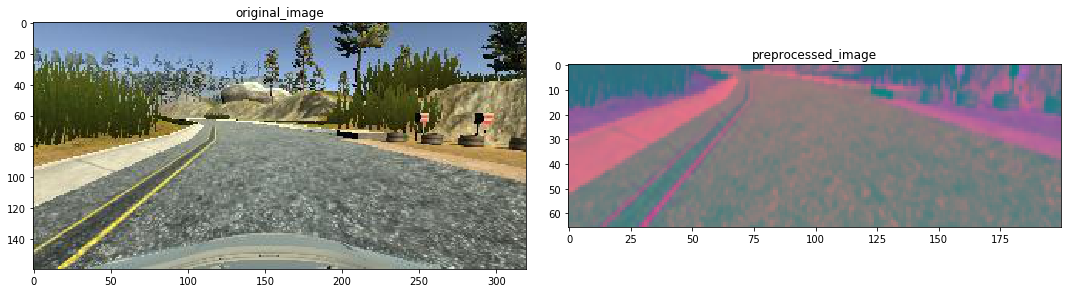

In [0]:
import cv2
def img_preprocess(img):
  img=img[60:135,:]
  img=cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
  img=cv2.GaussianBlur(img,(3,3),0)
  img=cv2.resize(img,(200,66))
  img=img/255
  return img


image=image_paths[100]
original_image=mpimg.imread(image)
preprocessed_image=img_preprocess(original_image)

fig,axs=plt.subplots(1,2,figsize=(15,10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title("original_image")
axs[1].imshow(preprocessed_image)
axs[1].set_title("preprocessed_image")

In [0]:
def batch_generator(image_paths,steering_ang,batch_size,istraining):
  
  while True:
    batch_img=[]
    batch_steering=[]
    
    for i in range(batch_size):
      random_index=random.randint(0,len(image_paths)-1)
      
      if istraining:
        im,steering=random_augment(image_paths[random_index],steering_ang[random_index])
        
      else:
        im=mpimg.imread(image_paths[random_index])
        steering=steering_ang[random_index]
        
      im=img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
      
    yield(np.asarray(batch_img),np.asarray(batch_steering)) 

In [0]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, 5, 5, subsample=(2, 2), input_shape=(66, 200, 3), activation='elu'))
  model.add(Convolution2D(36, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(48, 5, 5, subsample=(2, 2), activation='elu'))
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  
  model.add(Convolution2D(64, 3, 3, activation='elu'))
  #model.add(Dropout(0.5))
  
  
  model.add(Flatten())
  
  model.add(Dense(100, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation = 'elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(10, activation = 'elu'))
  #model.add(Dropout(0.5))

  model.add(Dense(1))
  
  optimizer = Adam(lr=1e-4)
  model.compile(loss='mse', optimizer=optimizer,metrics=["accuracy"])
  return model

In [0]:
x_train.shape

(1300,)

In [0]:
model=nvidia_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               115300    
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), act

In [0]:
history = model.fit_generator(batch_generator(x_train, y_train, 100, 1),
                                  steps_per_epoch=300, 
                                  epochs=5,
                                  validation_data=batch_generator(x_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)


Epoch 1/5
300/300 [==============================] - 145s 485ms/step - loss: 0.1099 - acc: 0.1778 - val_loss: 0.0796 - val_acc: 0.1880
Epoch 2/5
300/300 [==============================] - 142s 472ms/step - loss: 0.0908 - acc: 0.1811 - val_loss: 0.0599 - val_acc: 0.1848
Epoch 3/5
300/300 [==============================] - 140s 468ms/step - loss: 0.0770 - acc: 0.1837 - val_loss: 0.0562 - val_acc: 0.1908
Epoch 4/5
300/300 [==============================] - 139s 463ms/step - loss: 0.0701 - acc: 0.1800 - val_loss: 0.0597 - val_acc: 0.1849
Epoch 5/5
300/300 [==============================] - 138s 459ms/step - loss: 0.0668 - acc: 0.1801 - val_loss: 0.0593 - val_acc: 0.1897


Text(0.5, 1.0, 'epoch')

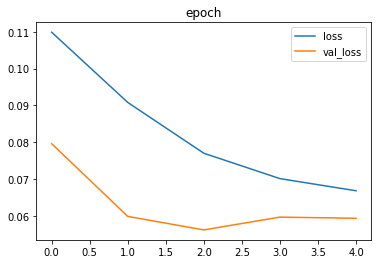

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["loss","val_loss"])
plt.title("loss")
plt.title("epoch")

In [0]:
#install all the packages for self driving car
conda install -c conda-forge tensorflow
python-socketio
eventlet
flask
opencv-python
tensorflow
pillow
keras
#pip freeze is used for checking the libraries installed

In [0]:
model.save("model3.h5")

In [0]:

from google.colab import files
files.download("model3.h5")
